In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#Scikit Learn Imports
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

df = pd.read_csv('volve_wells.csv', usecols=['WELL', 'DEPTH', 'RHOB', 'GR', 'NPHI', 'PEF', 'DT'])

In [11]:
df = df.dropna()

In [14]:
# Training Wells
training_wells = ['15_9-F-11A', '15_9-F-1A']

# Test Well
test_well = ['15_9-F-1B']

# Create training and testing dataframes
train_val_df = df[df['WELL'].isin(training_wells)].copy()
test_df = df[df['WELL'].isin(test_well)].copy()

In [15]:
train_val_df.describe()

,DEPTH,NPHI,RHOB,GR,PEF,DT
count,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000,21402.000000
mean,3145.700869,0.164598,2.476850,39.457715,7.099813,76.971795
std,310.290467,0.097728,0.147431,58.155095,1.191591,14.165137
min,2600.000000,0.010000,1.980600,0.852000,4.297800,53.165000
25%,2877.500000,0.095700,2.392025,9.318250,6.218600,66.773575
50%,3145.000000,0.135000,2.534150,27.278000,7.503850,72.526250
75%,3412.500000,0.214600,2.582000,44.189600,8.008000,85.563900
max,3720.000000,0.593200,3.025000,1124.403000,13.841000,126.827000


In [16]:
test_df.describe()

,DEPTH,NPHI,RHOB,GR,PEF,DT
count,3001.00000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,3250.00000,0.208357,2.450721,73.920177,6.482926,85.047727
std,86.64584,0.101037,0.138097,63.836318,0.839402,14.814647
min,3100.00000,0.059500,2.111800,8.001500,4.729900,58.631800
25%,3175.00000,0.144400,2.339000,37.876600,5.944100,74.530600
50%,3250.00000,0.173600,2.486800,50.522200,6.382400,82.544200
75%,3325.00000,0.234900,2.543300,68.899200,6.958300,88.941400
max,3400.00000,0.557600,3.051700,297.767300,10.987600,125.982700


In [17]:
# Setup the columns for training and target features
X = train_val_df[['RHOB', 'GR', 'NPHI', 'PEF']]
y = train_val_df['DT']

# Split the data into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [18]:
scaler = StandardScaler()

#Fit the StandardScaler to the training data
X_train = scaler.fit_transform(X_train)

# Apply the StandardScaler, but not fit, to the validation data
X_val = scaler.transform(X_val)

In [19]:
model = MLPRegressor(hidden_layer_sizes=(64, 64,64), 
                     activation="relu" ,
                     random_state=42, max_iter=2000)

In [20]:
model.fit(X_train, y_train)

#Predict on the validation data
y_pred = model.predict(X_val)

In [21]:
mae = metrics.mean_absolute_error(y_val, y_pred)

mse = metrics.mean_squared_error(y_val, y_pred)
rmse = mse**0.5 

r2 = metrics.r2_score(y_val, y_pred)

print(f"""
MAE: \t{mae:.2f}
RMSE: \t{rmse:.2f}
r2: \t{r2:.2f}
""")


MAE: 	2.12
RMSE: 	3.46
r2: 	0.94



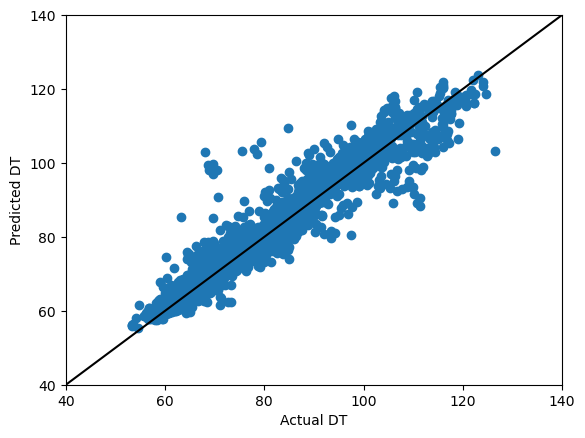

In [22]:
plt.scatter(y_val, y_pred)
plt.xlim(40, 140)
plt.ylim(40, 140)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
plt.plot([40,140], [40,140], 'black') #1 to 1 line
plt.show()

In [23]:
test_well_x = test_df[['RHOB', 'GR', 'NPHI', 'PEF']]

test_well_x = scaler.transform(test_well_x)

test_df['TEST_DT'] = model.predict(test_well_x)

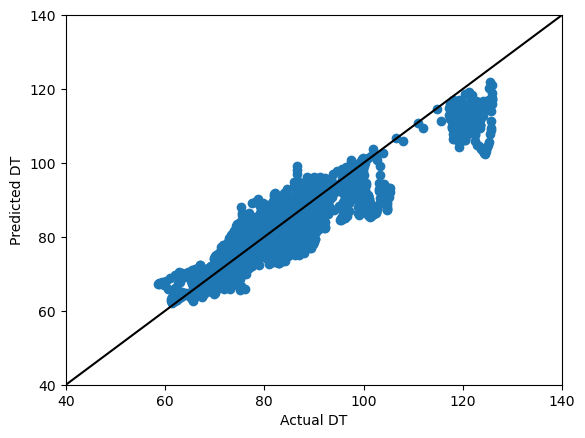

In [24]:
plt.scatter(test_df['DT'], test_df['TEST_DT'])
plt.xlim(40, 140)
plt.ylim(40, 140)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
plt.plot([40,140], [40,140], 'black') #1 to 1 line
plt.show()

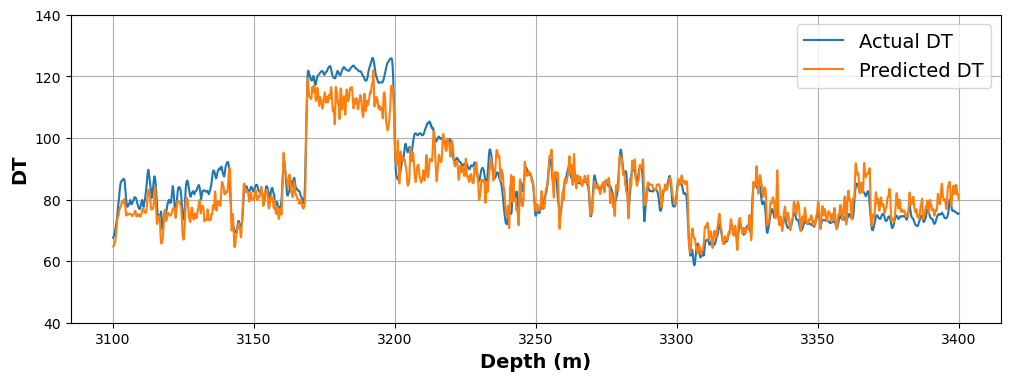

In [25]:
plt.figure(figsize=(12, 4))
plt.plot(test_df['DEPTH'], test_df['DT'], label='Actual DT')
plt.plot(test_df['DEPTH'], test_df['TEST_DT'], label='Predicted DT')

plt.xlabel('Depth (m)', fontsize=14, fontweight='bold')
plt.ylabel('DT', fontsize=14,fontweight='bold')

plt.ylim(40, 140)
plt.legend(fontsize=14)
plt.grid()